In [26]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect('test.db')
c = conn.cursor()

In [27]:
df = pd.read_csv('NYMEX_DL_NG1!, 1M_b643a.csv')
df

,time,open,high,low,close,21 SMMA,50 SMMA,100 SMMA,200 SMMA,EMA(2),...,Leading Span A,Leading Span B,SuperTrend,Supertrend HTF,Supertrend HTF Trend Up,Supertrend HTF Trend Down,Volume,Volume MA,3 Line Strike Up,ATR
0,875656800,3.180,3.850,2.840,3.552,2.282372,2.057240,NaN,NaN,3.334326,...,NaN,NaN,1.809522,2.584710,NaN,NaN,752432,444661.70,0,0.620829
1,878511600,3.570,3.610,2.515,2.578,2.296450,2.067655,NaN,NaN,2.830109,...,NaN,NaN,1.809522,3.044381,NaN,NaN,598129,456351.40,0,0.654699
2,880930800,2.660,2.810,2.140,2.264,2.294905,2.071582,NaN,NaN,2.452703,...,NaN,NaN,1.809522,3.036322,NaN,3.036322,569480,468739.15,0,0.655792
3,883609200,2.200,2.280,1.970,2.257,2.293100,2.075290,NaN,NaN,2.322234,...,NaN,NaN,1.809522,2.506044,NaN,NaN,598871,484359.55,0,0.631092
4,886374000,2.220,2.430,2.150,2.321,2.294428,2.080205,NaN,NaN,2.321411,...,NaN,NaN,1.809522,2.392403,NaN,NaN,582365,496762.70,0,0.606014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,1651442400,7.412,9.447,6.430,8.145,3.810448,3.500119,3.695449,3.679937,7.623382,...,2.7180,3.2240,3.737620,5.879297,NaN,NaN,2383521,2786174.95,0,1.230712
296,1654034400,8.271,9.664,5.357,5.424,3.887284,3.538596,3.712734,3.688658,6.157127,...,2.7180,3.2240,3.737620,7.026045,NaN,NaN,2716538,2760876.05,0,1.450447
297,1656626400,5.701,9.752,5.325,8.229,4.094032,3.632404,3.757897,3.711359,7.538376,...,2.6785,3.1845,3.737620,7.525367,NaN,7.525367,1911789,2725557.00,0,1.663058
298,1659304800,7.910,10.028,7.532,9.127,4.333697,3.742296,3.811588,3.738437,8.597459,...,2.6785,3.1845,3.737620,6.684489,6.684489,NaN,2164785,2678191.30,0,1.722554


In [4]:
s_time = pd.to_datetime(df['time'], unit='s')

In [5]:
df.to_sql('NG', con=conn)

300

In [30]:
df = pd.read_sql('SELECT open,high,low,close FROM NG', conn)
df

,open,high,low,close
0,3.180,3.850,2.840,3.552
1,3.570,3.610,2.515,2.578
2,2.660,2.810,2.140,2.264
3,2.200,2.280,1.970,2.257
4,2.220,2.430,2.150,2.321
...,...,...,...,...
295,7.412,9.447,6.430,8.145
296,8.271,9.664,5.357,5.424
297,5.701,9.752,5.325,8.229
298,7.910,10.028,7.532,9.127


In [31]:
#Profitt loss
pl = df['close']-df['open']
df['p/l'] = pl
#Variance in one month
va = df['high']-df['low']
df['va'] = va
#time
df['time'] = s_time
df.head(10)

,open,high,low,close,p/l,va,time
0,3.180,3.850,2.840,3.552,0.372,1.010,1997-09-30 22:00:00
1,3.570,3.610,2.515,2.578,-0.992,1.095,1997-11-02 23:00:00
2,2.660,2.810,2.140,2.264,-0.396,0.670,1997-11-30 23:00:00
3,2.200,2.280,1.970,2.257,0.057,0.310,1997-12-31 23:00:00
4,2.220,2.430,2.150,2.321,0.101,0.280,1998-02-01 23:00:00
5,2.335,2.535,2.105,2.522,0.187,0.430,1998-03-01 23:00:00
6,2.525,2.725,2.152,2.221,-0.304,0.573,1998-03-31 23:00:00
7,2.240,2.285,1.990,2.170,-0.070,0.295,1998-04-30 22:00:00
8,2.145,2.485,1.915,2.469,0.324,0.570,1998-05-31 22:00:00
9,2.480,2.520,1.835,1.844,-0.636,0.685,1998-06-30 22:00:00


In [32]:
my_list =  pd.to_datetime(df['time'], format='%Y-%m-%d')
year = my_list.dt.year
day = my_list.dt.day
fake_month = my_list.dt.month
fake_month

0       9
1      11
2      11
3      12
4       2
       ..
295     5
296     5
297     6
298     7
299     8
Name: time, Length: 300, dtype: int64

In [37]:
import numpy as np
y = np.zeros(300)
m = np.zeros(300)
for i in range(300):
    if day[i]>5:
        y[i] = year[i]
        m[i] = fake_month[i] + 1
        #print(year[i],day[i],fake_month[i],m[i],y[i])
    else:
        y[i] = year[i]
        m[i] = fake_month[i]
    if m[i]==13:
        y[i] = year[i] + 1
        m[i] = 1
        #print(year[i],day[i],fake_month[i],m[i],y[i])
df['year']=y
df['month']=m
df

,open,high,low,close,p/l,va,time,year,month,Month
0,3.180,3.850,2.840,3.552,0.372,1.010,1997-09-30 22:00:00,1997.0,10.0,10.0
1,3.570,3.610,2.515,2.578,-0.992,1.095,1997-11-02 23:00:00,1997.0,11.0,11.0
2,2.660,2.810,2.140,2.264,-0.396,0.670,1997-11-30 23:00:00,1997.0,12.0,12.0
3,2.200,2.280,1.970,2.257,0.057,0.310,1997-12-31 23:00:00,1998.0,1.0,1.0
4,2.220,2.430,2.150,2.321,0.101,0.280,1998-02-01 23:00:00,1998.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...
295,7.412,9.447,6.430,8.145,0.733,3.017,2022-05-01 22:00:00,2022.0,5.0,5.0
296,8.271,9.664,5.357,5.424,-2.847,4.307,2022-05-31 22:00:00,2022.0,6.0,6.0
297,5.701,9.752,5.325,8.229,2.528,4.427,2022-06-30 22:00:00,2022.0,7.0,7.0
298,7.910,10.028,7.532,9.127,1.217,2.496,2022-07-31 22:00:00,2022.0,8.0,8.0


In [38]:
df.head(2)

,open,high,low,close,p/l,va,time,year,month,Month
0,3.18,3.85,2.840,3.552,0.372,1.010,1997-09-30 22:00:00,1997.0,10.0,10.0
1,3.57,3.61,2.515,2.578,-0.992,1.095,1997-11-02 23:00:00,1997.0,11.0,11.0


year
1997.0    AxesSubplot(0.125,0.11;0.775x0.77)
1998.0    AxesSubplot(0.125,0.11;0.775x0.77)
1999.0    AxesSubplot(0.125,0.11;0.775x0.77)
2000.0    AxesSubplot(0.125,0.11;0.775x0.77)
2001.0    AxesSubplot(0.125,0.11;0.775x0.77)
2002.0    AxesSubplot(0.125,0.11;0.775x0.77)
2003.0    AxesSubplot(0.125,0.11;0.775x0.77)
2004.0    AxesSubplot(0.125,0.11;0.775x0.77)
2005.0    AxesSubplot(0.125,0.11;0.775x0.77)
2006.0    AxesSubplot(0.125,0.11;0.775x0.77)
2007.0    AxesSubplot(0.125,0.11;0.775x0.77)
2008.0    AxesSubplot(0.125,0.11;0.775x0.77)
2009.0    AxesSubplot(0.125,0.11;0.775x0.77)
2010.0    AxesSubplot(0.125,0.11;0.775x0.77)
2011.0    AxesSubplot(0.125,0.11;0.775x0.77)
2012.0    AxesSubplot(0.125,0.11;0.775x0.77)
2013.0    AxesSubplot(0.125,0.11;0.775x0.77)
2014.0    AxesSubplot(0.125,0.11;0.775x0.77)
2015.0    AxesSubplot(0.125,0.11;0.775x0.77)
2016.0    AxesSubplot(0.125,0.11;0.775x0.77)
2017.0    AxesSubplot(0.125,0.11;0.775x0.77)
2018.0    AxesSubplot(0.125,0.11;0.775x0.77)
2019.

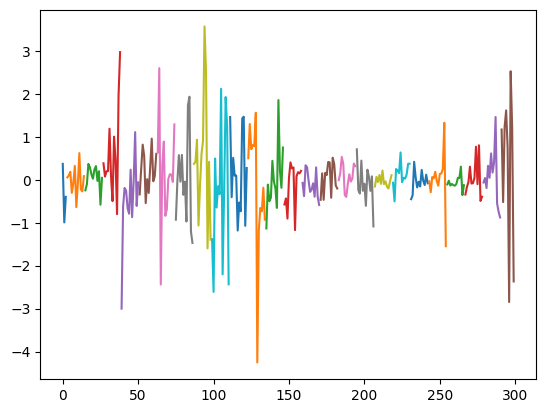

In [12]:
df.groupby('year')['p/l'].plot()

month
1.0     AxesSubplot(0.125,0.11;0.775x0.77)
2.0     AxesSubplot(0.125,0.11;0.775x0.77)
3.0     AxesSubplot(0.125,0.11;0.775x0.77)
4.0     AxesSubplot(0.125,0.11;0.775x0.77)
5.0     AxesSubplot(0.125,0.11;0.775x0.77)
6.0     AxesSubplot(0.125,0.11;0.775x0.77)
7.0     AxesSubplot(0.125,0.11;0.775x0.77)
8.0     AxesSubplot(0.125,0.11;0.775x0.77)
9.0     AxesSubplot(0.125,0.11;0.775x0.77)
10.0    AxesSubplot(0.125,0.11;0.775x0.77)
11.0    AxesSubplot(0.125,0.11;0.775x0.77)
12.0    AxesSubplot(0.125,0.11;0.775x0.77)
Name: p/l, dtype: object

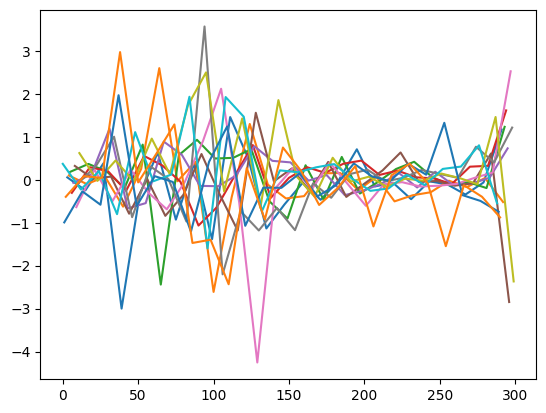

In [13]:
df.groupby('month')['p/l'].plot()

In [15]:
#Creiamo il dataframe per le correlazioni
df_corr=pd.DataFrame()
df_corr

""


In [16]:
#creiamo la series da inserire all'interno del dataframe appena creato
i=2003
filtered_df = df[df['year'] == i]
print(list(filtered_df['p/l']))

[0.6350000000000007, 2.601000000000001, -2.4400000000000004, 0.33499999999999996, 0.8899999999999997, -0.8390000000000004, -0.6870000000000003, 0.020999999999999908, 0.1299999999999999, 0.12300000000000022, -0.04999999999999982, 1.29]


In [17]:
#aggiungiamo la series all'interno del dataframe
df_corr['2003'] = list(filtered_df['p/l'])
df_corr

,2003
0,0.635
1,2.601
2,-2.440
3,0.335
4,0.890
5,-0.839
6,-0.687
7,0.021
8,0.130
9,0.123


In [54]:
#mettiamo tutti i passaggi assieme
df_corr=pd.DataFrame()
for i in range(1998,2021,1):
    filtered_df = df[df['year'] == i]
    df_corr[i] = list(filtered_df['p/l'])
df_corr.T

,0,1,2,3,4,5,6,7,8,9,10,11
1998,0.057,0.101,0.187,-0.304,-0.070,0.324,-0.636,-0.088,0.623,-0.225,-0.269,0.085
1999,-0.245,-0.100,0.370,0.293,0.128,0.025,0.240,0.320,-0.025,0.200,-0.580,0.045
2000,0.385,0.075,0.200,0.201,1.190,0.075,-0.495,1.005,0.450,-0.800,1.970,2.975
2001,-3.000,-0.625,-0.190,-0.255,-0.666,-0.789,0.236,-0.870,-0.036,1.111,-0.609,-0.060
2002,-0.340,0.255,0.820,0.555,-0.543,0.015,-0.306,0.316,0.960,-0.034,0.085,0.604
2003,0.635,2.601,-2.440,0.335,0.890,-0.839,-0.687,0.021,0.130,0.123,-0.050,1.290
2004,-0.928,-0.034,0.575,-0.043,0.580,-0.349,-0.043,-0.971,1.735,1.935,-1.205,-1.471
2005,0.372,0.420,0.932,-1.065,-0.141,0.601,0.905,3.572,2.502,-1.597,0.420,-1.395
2006,-1.384,-2.611,0.496,-0.645,-0.149,-0.335,2.121,-2.202,-0.270,1.928,1.244,-2.433
2007,1.462,-0.405,0.512,0.095,0.102,-1.182,-0.529,-0.733,1.430,1.470,-1.071,0.274


In [113]:
#Corr tra i mesi diversi con un anno di differenza
for i in range(11):
    r = np.corrcoef(df_corr.iloc[i], df_corr.iloc[i+1])
    print((r[0][1]).round(2))

0.45
-0.44
-0.11
0.2
0.21
-0.44
0.1
0.4
-0.05
-0.37
0.14


In [110]:
df_corr.iloc[0]

1998    0.057
1999   -0.245
2000    0.385
2001   -3.000
2002   -0.340
2003    0.635
2004   -0.928
2005    0.372
2006   -1.384
2007    1.462
2008    0.502
2009   -1.133
2010   -0.574
2011   -0.072
2012   -0.466
2013   -0.009
2014    0.711
2015   -0.154
2016   -0.068
2017   -0.451
2018   -0.035
2019   -0.107
2020   -0.343
Name: 0, dtype: float64

In [69]:
df_corr.iloc[0].mean()

-0.2254347826086956

<AxesSubplot:xlabel='2008', ylabel='2009'>

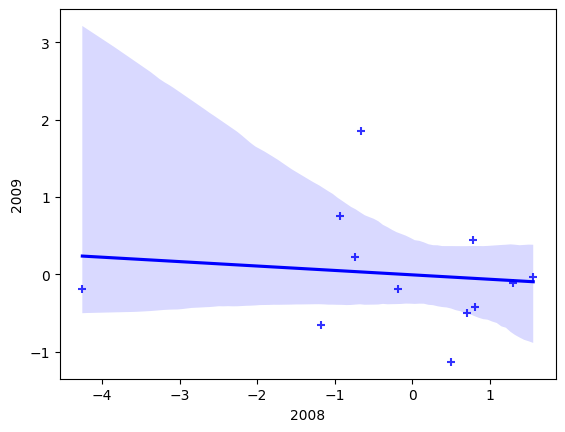

In [66]:
import seaborn as sns
i=10
sns.regplot(x=df_corr.T.iloc[i], y=df_corr.T.iloc[i+1], marker="+",fit_reg=True, color='blue')

In [93]:
df_corr.head(1)

,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,0.057,-0.245,0.385,-3.0,-0.34,0.635,-0.928,0.372,-1.384,1.462,...,-0.072,-0.466,-0.009,0.711,-0.154,-0.068,-0.451,-0.035,-0.107,-0.343


In [100]:
my_list = np.zeros(12)
for i in range(12):
    my_list[i] = df_corr.iloc[i].mean()
my_list

array([-0.22543478, -0.04995652,  0.05913043,  0.06582609,  0.09965217,
       -0.0193913 , -0.19073913, -0.06852174,  0.38547826,  0.23313043,
        0.02617391, -0.14221739])

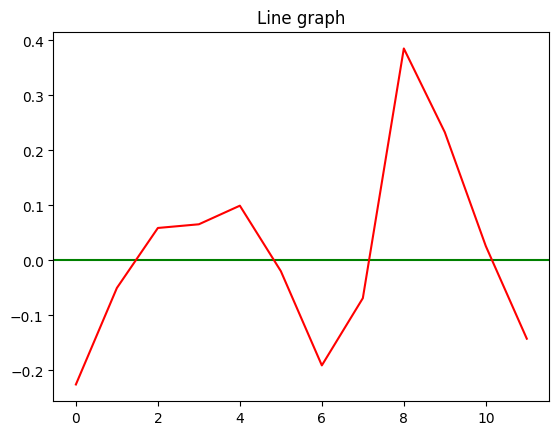

In [120]:
plt.title("Line graph")

x=np.arange(12)
y=my_list
plt.axhline(0, c='green')
plt.plot(x, y, color="red")

plt.show()

In [117]:
df_corr.T.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11
1998,0.057,0.101,0.187,-0.304,-0.07,0.324,-0.636,-0.088,0.623,-0.225,-0.269,0.085


In [116]:
df_corr.T.iloc[0]

0     0.057
1     0.101
2     0.187
3    -0.304
4    -0.070
5     0.324
6    -0.636
7    -0.088
8     0.623
9    -0.225
10   -0.269
11    0.085
Name: 1998, dtype: float64

In [115]:
#Corr tra la media dei risultati mensili con i singoli risultati
for i in range(11):
    r = np.corrcoef(df_corr.T.iloc[i], my_list)
    print((r[0][1]).round(2))

0.41
0.1
-0.2
0.52
0.41
-0.13
0.81
0.06
0.31
0.39
0.2


In [39]:
df_corr.T.columns

RangeIndex(start=0, stop=12, step=1)

In [40]:
df_corr_2 = df_corr.T
df_corr_2.rename(columns = {'0':'Gennaio',
                          '1':'Febbraio',
                         '2':'Marzo',
                         '3':'Aprile',
                         '4':'Maggio',
                         '5':'Giugno',
                         '7':'Luglio',
                         '8':'Agosto',
                         '9':'Settembre',
                         '10':'Ottobre',
                         '11':'Novembre',
                         '12':'Dicembre'}, inplace = True)
df_corr_2

,0,1,2,3,4,5,6,7,8,9,10,11
1998,0.057,0.101,0.187,-0.304,-0.070,0.324,-0.636,-0.088,0.623,-0.225,-0.269,0.085
1999,-0.245,-0.100,0.370,0.293,0.128,0.025,0.240,0.320,-0.025,0.200,-0.580,0.045
2000,0.385,0.075,0.200,0.201,1.190,0.075,-0.495,1.005,0.450,-0.800,1.970,2.975
2001,-3.000,-0.625,-0.190,-0.255,-0.666,-0.789,0.236,-0.870,-0.036,1.111,-0.609,-0.060
2002,-0.340,0.255,0.820,0.555,-0.543,0.015,-0.306,0.316,0.960,-0.034,0.085,0.604
2003,0.635,2.601,-2.440,0.335,0.890,-0.839,-0.687,0.021,0.130,0.123,-0.050,1.290
2004,-0.928,-0.034,0.575,-0.043,0.580,-0.349,-0.043,-0.971,1.735,1.935,-1.205,-1.471
2005,0.372,0.420,0.932,-1.065,-0.141,0.601,0.905,3.572,2.502,-1.597,0.420,-1.395
2006,-1.384,-2.611,0.496,-0.645,-0.149,-0.335,2.121,-2.202,-0.270,1.928,1.244,-2.433
2007,1.462,-0.405,0.512,0.095,0.102,-1.182,-0.529,-0.733,1.430,1.470,-1.071,0.274


In [ ]:
df_corr_2.corr()

In [ ]:
df_corr_2['0']

In [ ]:
sns.regplot(df_corr_2[0],df_corr_2[1],
            fit_reg=True, color='red')

In [ ]:
for i in range(1999,2010,1):
    df_mask = df['year'] == i
    filtered_df = df[df_mask]
    filtered_df['p/l'].plot()

In [ ]:
import seaborn as sns
sns.set_theme(style="ticks")
  
g = sns.catplot(x="p/l",
                #kind="count",
                #col="month",
                row='year',
                data=df)

In [ ]:
df['time_converted']=df['time'].astype(str)
df.head(1)

In [ ]:
my_list = df.time_converted[0].split('-')
my_list

In [ ]:
df.info()

In [ ]:
df['p/l'][4:16].plot()

In [ ]:
df['p/l'].plot()

In [ ]:
plt.scatter(df['va'],df['p/l'])

In [ ]:
plt.scatter(df['p/l'],df.index)

In [ ]:
df['time'] = pd.to_datetime(df['time'], format="%Y-%m-%dT%H:%M:%S.%f", errors = 'coerce')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
#date_time=pd.to_datetime(df['time'], format='%Y/%m/%d %H:%M:%S')
df['time'] = pd.to_datetime(df["time"].dt.strftime('%Y-%m'))
formatted_df = df["time"].dt.strftime("%m/%d/%y")
formatted_df